In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16,12]
plt.rcParams.update({'font.size':18})

## Create a simple signal with two frequencies

In [2]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t) #Sum of 2 freqs
f_clean = f
f = f + 2.5*np.random.randn(len(t)) # Add noise

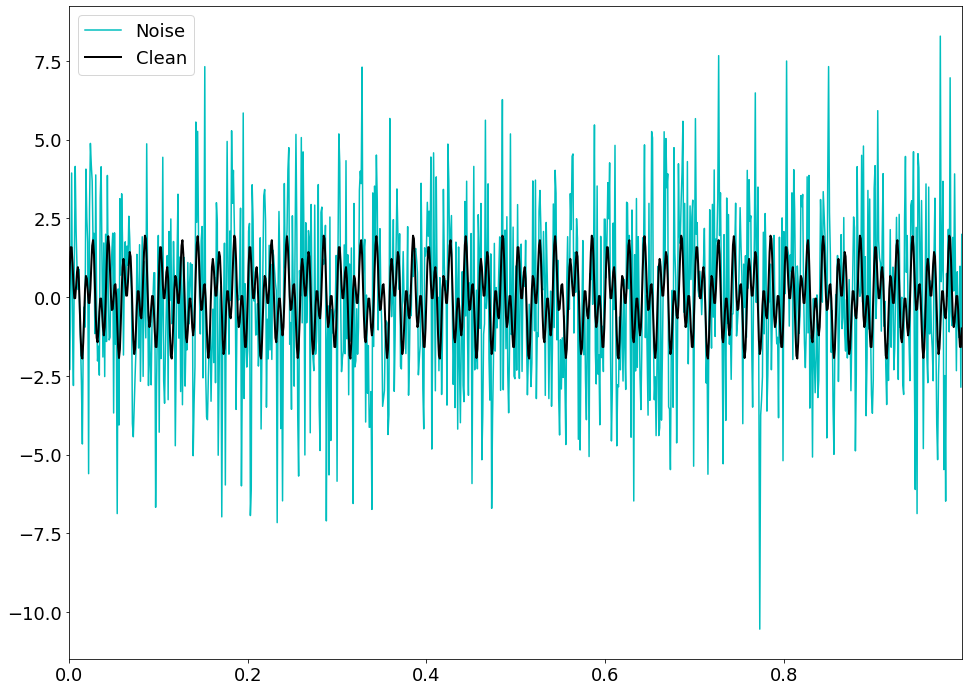

In [11]:
plt.plot(t,f,color='c',LineWidth=1.5,label='Noise')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


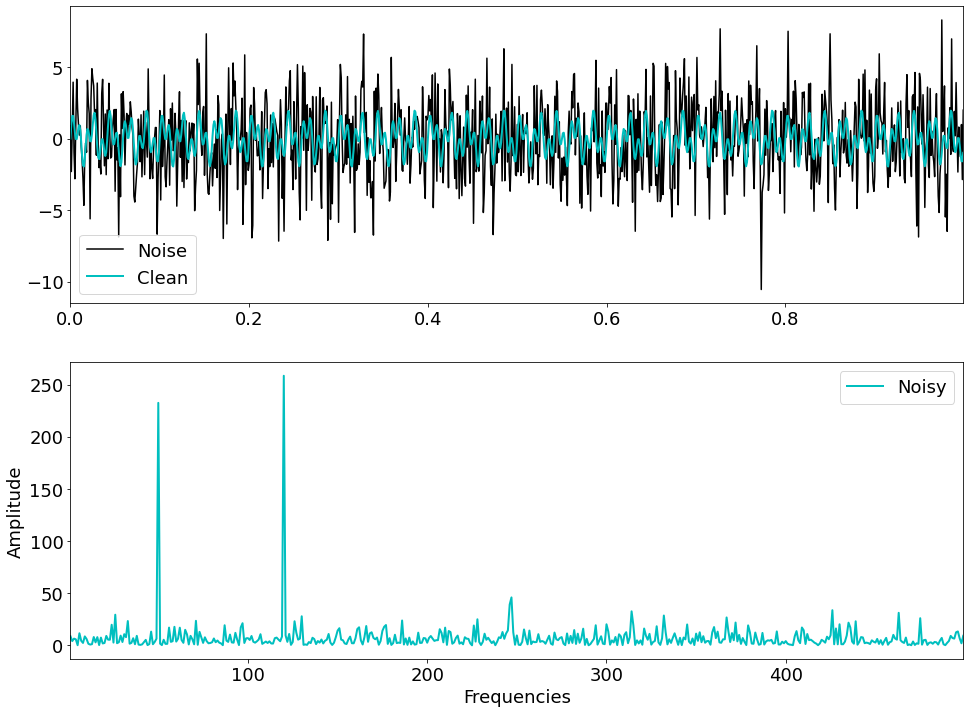

In [15]:
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noise')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.xlabel('Frequencies')
plt.ylabel('Amplitude')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()

## Use the PSD to filter out noise

In [17]:
indices = PSD > 100
PSDclean = PSD * indices
fhat = indices * fhat
ffilt = np.fft.ifft(fhat)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


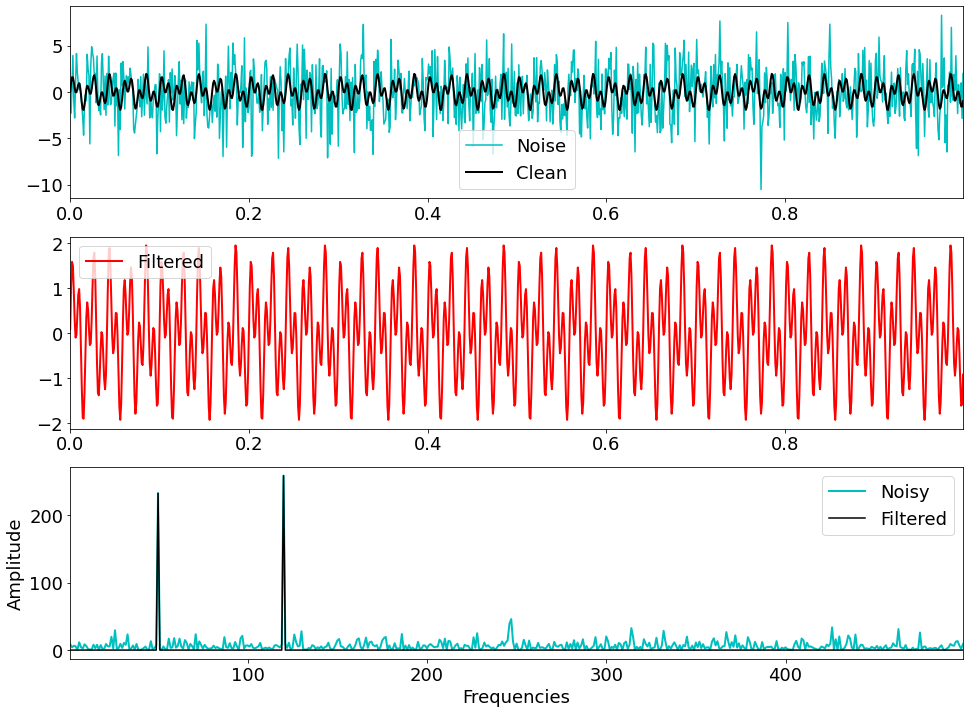

In [19]:
fig,axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(t,f,color='c',LineWidth=1.5,label='Noise')
plt.plot(t,f_clean,color='k',LineWidth=2,label='Clean')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(t,ffilt,color='r',LineWidth=2,label='Filtered')
plt.xlim(t[0],t[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSD[L],color='c',LineWidth=2,label='Noisy')
plt.plot(freq[L],PSDclean[L],color='k',LineWidth=1.5,label='Filtered')
plt.xlabel('Frequencies')
plt.ylabel('Amplitude')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.legend()

plt.show()